# 예제 데이터로 암 진단 분류하기

# 1.라이브러리 임포트

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #졍규화
from sklearn.linear_model import LogisticRegression #분류모델인데, 회귀인 듯 하는?

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


# 2.예시 데이터 생성

In [38]:
np.random.seed(42)
data_size = 300  #행 수
features = 10 #변수

# randn() : 정규분포(평균0, 표준편차1) 안에서 0,1 사이 난수 생성, ()안에는 shape
X = np.random.randn(data_size,features) #300, 10
y = (np.random.randn(data_size) > 0.5).astype(int)

#위에서 생성된 numpy array를 데이터 프레임으로 변경 예정, feature에 이름 부여
columns = [f"feature{i}" for i in range(features)] # features 10개에 해당하는 만큼, 0~9

In [39]:
columns

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9']

In [40]:
#pd.DataFrame(X,y)
df = pd.DataFrame(X, columns=columns)
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [41]:
df['label'] = y

In [42]:
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,label
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,1
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,1


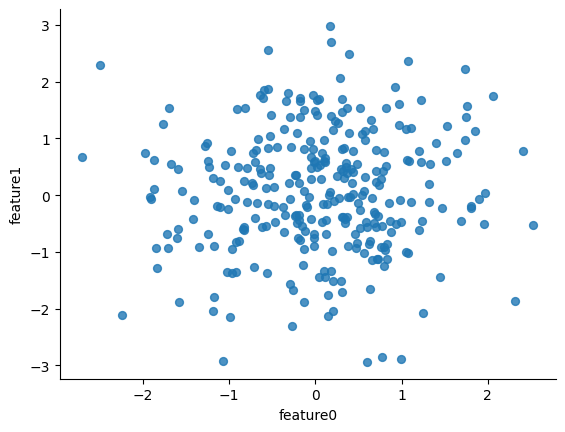

In [72]:
# @title feature0 vs feature1

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='feature0', y='feature1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3.데이터 전처리
모델에 들어갈 수 있는 형태로 바꿔줌

X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (240, 10)
X_test shape :  (60, 10)
y_train shape :  (240,)
y_test shape :  (60,)


## 1. 정규화(Normalization):
- 역할: 데이터의 스케일을 조정하여 각 특징(feature)이 같은 범위를 가지도록 하는 것입니다. 주로 0과 1 사이로 조정합니다.
- 이유: 정규화는 경사하강법과 같은 최적화 알고리즘의 수렴 속도를 높이고, 특정 특징이 다른 특징보다 지나치게 큰 영향을 미치는 것을 방지합니다.
- 방법: 일반적으로 Min-Max 정규화나 표준화(Z-Score)를 사용합니다.
    1. Min-Max 정규화: 각 데이터 포인트의 값을 0과 1 사이로 변환합니다.

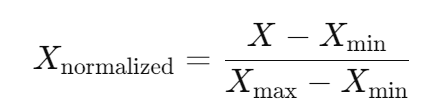

    2. 표준화(Z-Score): 데이터 포인트를 평균이 0이고 표준 편차가 1이 되도록 변환합니다

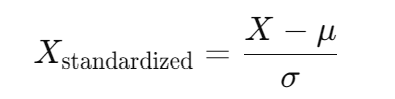

    - 여기서 𝜇는 평균,  는 표준 편차입니다.

## 2. fit 해준다는 것:
- 역할: 모델이 주어진 데이터에 맞춰지도록 매개변수를 조정하는 과정입니다.
- 과정:
    - 모델에 데이터를 입력하여 손실 함수의 값을 계산합니다.
    - 손실 함수를 최소화하도록 모델의 매개변수를 조정합니다.
    - 이 과정을 여러 번 반복하여 최적의 매개변수를 찾습니다.

[정리]
- 정규화: 데이터의 범위를 조정하여 학습 과정에서 효율적으로 사용되도록 하는 과정입니다.
- fit: 모델이 주어진 학습 데이터를 통해 매개변수를 최적화하는 과정입니다. 이를 통해 모델은 입력 데이터와 타겟 간의 관계를 학습하고 예측 능력을 갖추게 됩니다.

In [45]:
# 데이터 정규화
scaler = StandardScaler()
# 학습, 변환 후 정규화
X_train_scaled = scaler.fit_transform(X_train) # fit_transform: 학습과 변환 동시에

In [46]:
X_train[0]

array([ 0.16057398,  0.00304602,  0.43693817,  1.19064627,  0.94955414,
       -1.48489797, -2.55392113,  0.93431991, -1.3668787 , -0.2247654 ])

In [47]:
#X_train_scaled[:10]
X_train_scaled[0]

array([ 0.12704631, -0.08247099,  0.48683579,  1.21427839,  0.78326148,
       -1.45737458, -2.50413138,  0.90724522, -1.52258614, -0.3807814 ])

In [48]:
X_test_scaled = scaler.transform(X_test)

# 4.분류 모델 정의 및 학습

In [49]:
model = LogisticRegression() #사이킷런에 있는 함수

In [50]:
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [51]:
# 모델학습
# model.fit(X,y)
model.fit(X_train_scaled, y_train)

LogisticRegression()

# 5.분류 결과 예측 및 평가

In [52]:
# 예측
y_pred = model.predict(X_test_scaled)

In [53]:
y_pred.shape

(60,)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# 정확도(Accuracy) 체크
# 맞은 것의 갯수 y <-> y_pred
# accuracy_score , confusion_matrix , classification_report

accuracy = accuracy_score(y_test, y_pred)

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [57]:
# print(classification_report(y_test, y_pred))
class_report = print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        40
           1       0.00      0.00      0.00        20

    accuracy                           0.67        60
   macro avg       0.33      0.50      0.40        60
weighted avg       0.44      0.67      0.53        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print("accuracy:", accuracy)
print("[Confusion Matrix]")
print(conf_matrix)
print("-"* 100)
print("[classification Report]")
print(class_report)

accuracy: 0.6666666666666666
[Confusion Matrix]
[[40  0]
 [20  0]]
----------------------------------------------------------------------------------------------------
[classification Report]
None


# 6.결과 시각화

In [69]:
# X_test
# X_test[:, 0] # 첫번째 feature
# X_test[:, 1] # 두번째 feature
X_test[:, 0], X_test[:, 1]

(array([ 5.27958857e-04,  9.64851633e-01,  7.91031947e-01, -1.25040773e+00,
        -1.84618786e+00, -1.53098492e-02,  1.05194762e+00,  8.50897962e-01,
        -1.66940528e+00, -3.48652134e-01, -4.55122453e-02,  2.50492850e-01,
        -1.28537511e-01, -6.05860821e-01,  2.31465857e+00, -1.84087423e+00,
         3.86808521e-01,  3.68673309e-01,  1.73889966e+00,  2.42194567e-02,
         6.96954405e-01, -2.57376537e-01, -3.79127741e-01,  3.88578605e-01,
        -3.58340152e-01, -2.49940571e+00,  3.08050540e-01, -5.31214295e-01,
         6.98828420e-01,  1.20599452e+00,  1.07363175e+00, -5.73662007e-01,
        -2.19671888e-01, -1.18759842e+00, -1.59812435e+00,  7.78361076e-01,
         1.63996453e+00, -1.31256967e-01,  1.51639406e+00,  3.24083969e-01,
        -6.84629826e-01,  8.20482181e-01, -1.86871644e-01, -8.22220396e-01,
         8.65897875e-02,  4.59972143e-01, -1.02937151e+00, -3.35784699e-01,
         3.61395606e-01, -6.26790973e-02,  1.95845255e-01,  4.38475739e-01,
        -2.2

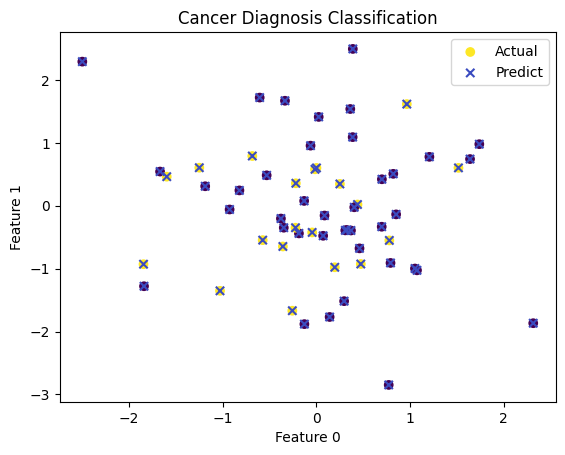

In [75]:
# 1, 2번 특성에 대해서 시각화
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predict')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.title('Cancer Diagnosis Classification')
plt.show()